In [38]:
import pandas as pd
import torch
from PIL import Image
from models.model_factory import create_yolov7_model
from torchvision.transforms.functional import pil_to_tensor

device = torch.device("cuda:0")

model = create_yolov7_model(
    architecture="yolov7-tiny", num_classes=1, pretrained=False
)
model.load_state_dict(torch.load("model.pt"))
model.to(device)

pil_image = Image.open("testing_images/vid_5_26580.jpg")
image = pil_image.resize((640, 640), resample=Image.BILINEAR)
image = pil_to_tensor(image)[None] / 255
image = image.to(device)

with torch.no_grad(), torch.cuda.amp.autocast(enabled=True, dtype=torch.float16, cache_enabled=True):
    out = model(image)

out = model.postprocess(out, conf_thres=0.3, nms_thres=0.3, max_detections=5000)[0]
out = out.tolist()
print(f"Number of objects found: {len(out)}")

Number of objects found: 1


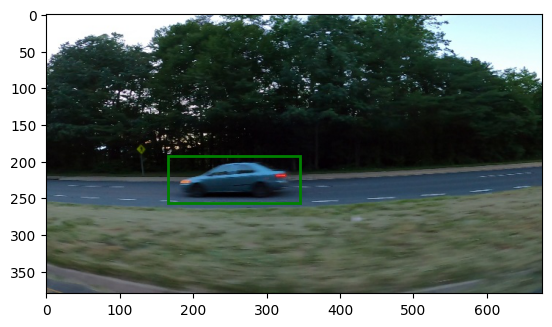

In [42]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.imshow(pil_image)
ax = plt.gca()
for x0, y0, x1, y1, conf, class_id in out:
    x0 = pil_image.width * (x0 / 640)
    y0 = pil_image.height * (y0 / 640)
    x1 = pil_image.width * (x1 / 640)
    y1 = pil_image.height * (y1 / 640)
    rect = Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='green', facecolor='none')
    ax.add_patch(rect)

plt.show()